In [105]:
# Dependencies
import tweepy
import json
import pandas as pd
import os

In [106]:
# Set up the path to your config file

In [107]:
# This will search for the config file in the working directory
# Be sure that your config file is in your root repo folder
consumer_key = "vizp0icdkTmn44rkb9Lo59082"
consumer_secret = "ot3cIXEzJHJ6ZEUpbkTjdRpsynPvkqje3hrWibaPIJOE2LC5oY"
access_token = "1326308110026371073-7n14jR6OFVzQ4fbpJVprh5IDfeSe06"
access_token_secret = "Fm5xG4INCV5Q08nAbxsLQZdL0tqvYFuN6OuAM6MyEen1V"

In [108]:
# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
# api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())
api = tweepy.API(auth)

In [109]:
# Target User Account
user_account = "MayorBowser"

In [110]:
# Set up variables
tweets = []

tweet_id = []
created_at = []
favorite_count = []
full_text = []
entities = []

In [111]:
# Iterate through the 500 tweets
for tweet in tweepy.Cursor(api.user_timeline, 'MayorBowser', tweet_mode='extended').items(500):
    tweets.append(tweet)

In [112]:
tweets[0]._json

{'created_at': 'Wed Nov 11 02:00:16 +0000 2020',
 'id': 1326343959627624448,
 'id_str': '1326343959627624448',
 'full_text': 'In observance of Veterans Day, public testing sites for COVID-19 will be closed tomorrow. To get a test, please call your doctor. Stay home if you are experiencing symptoms.',
 'truncated': False,
 'display_text_range': [0, 173],
 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': []},
 'source': '<a href="https://sproutsocial.com" rel="nofollow">Sprout Social</a>',
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'in_reply_to_screen_name': None,
 'user': {'id': 976542720,
  'id_str': '976542720',
  'name': 'Mayor Muriel Bowser',
  'screen_name': 'MayorBowser',
  'location': 'Washington, DC',
  'description': "Official account of the Mayor of Washington, DC. Together, we're working to give every Washingtonian a #FairShot. Tweets from Mayor Bowser signed MMB.

In [113]:
for t in tweets:
    tweet_id.append(t.id)
    created_at.append(t.created_at)
    favorite_count.append(t.favorite_count)
    full_text.append(t.full_text)
    entities.append(t.entities)

In [114]:
# Process data and build dataframe
tweets_df = pd.DataFrame({
    'Tweet ID': tweet_id,
    'Tweet Time': created_at,
    'Favorite Count': favorite_count,
    'Tweet Text': full_text    
    })

In [115]:
len(tweets_df)

500

In [116]:
# set DataFrame to not truncate
pd.set_option('display.max_columns', None)

In [117]:
# Preview DataFrame
tweets_df.head()

,Tweet ID,Tweet Time,Favorite Count,Tweet Text
0,1326343959627624448,2020-11-11 02:00:16,49,"In observance of Veterans Day, public testing sites for COVID-19 will be closed tomorrow. To get a test, please call your doctor. Stay home if you are experiencing symptoms."
1,1326268635048890368,2020-11-10 21:00:58,10,LIVE: District Economic Recovery Check-In https://t.co/1XKztZ01LS
2,1326238308138160128,2020-11-10 19:00:27,19,"The DC Mayor’s Office of Veterans Affairs serves the District’s 30,000 veterans and their families. If you're a Veteran in need of help, watch the video below to learn more about their services and call (202) 724-5454.\n\nhttps://t.co/6WZWuf1KX5"
3,1326212089220919302,2020-11-10 17:16:16,21,"Today’s COVID-19 public testing sites graphic has been updated. Open sites for Tuesday, November 10 below. https://t.co/LpiZ15691c"
4,1326208158176571392,2020-11-10 17:00:39,14,Looking ahead to Veterans Day? Service adjustments for District services may impact your plans.\n\nTo learn what's open and what's closed visit: https://t.co/npa3Vcz5W0 https://t.co/eqE7NzWk0b


In [118]:
tweets_df

,Tweet ID,Tweet Time,Favorite Count,Tweet Text
0,1326343959627624448,2020-11-11 02:00:16,49,"In observance of Veterans Day, public testing sites for COVID-19 will be closed tomorrow. To get a test, please call your doctor. Stay home if you are experiencing symptoms."
1,1326268635048890368,2020-11-10 21:00:58,10,LIVE: District Economic Recovery Check-In https://t.co/1XKztZ01LS
2,1326238308138160128,2020-11-10 19:00:27,19,"The DC Mayor’s Office of Veterans Affairs serves the District’s 30,000 veterans and their families. If you're a Veteran in need of help, watch the video below to learn more about their services and call (202) 724-5454.\n\nhttps://t.co/6WZWuf1KX5"
3,1326212089220919302,2020-11-10 17:16:16,21,"Today’s COVID-19 public testing sites graphic has been updated. Open sites for Tuesday, November 10 below. https://t.co/LpiZ15691c"
4,1326208158176571392,2020-11-10 17:00:39,14,Looking ahead to Veterans Day? Service adjustments for District services may impact your plans.\n\nTo learn what's open and what's closed visit: https://t.co/npa3Vcz5W0 https://t.co/eqE7NzWk0b
...,...,...,...,...
495,1306404624413401094,2020-09-17 01:28:28,0,@theroostdc @buzzbakeshop @ShopMadeInDC Welcome to DC! Thank you for supporting #MadeInDC.
496,1306403976133382155,2020-09-17 01:25:54,3,@levainbakery Welcome to DC! 👏🏽
497,1306390389184696320,2020-09-17 00:31:54,201,"Seven years ago today, the Navy Yard shooting claimed 12 lives and injured three others. Let's remember them today, their families, the victims, and the pain our community experienced because of senseless gun violence. We must never forget."
498,1306352572819800066,2020-09-16 22:01:38,69,Meet the first Solar For All Community Renewable Energy Facility (CREF) to come to Ward 8! It will provide over 750 residents with up to $500 in annual electricity bill savings.\n\nLearn more: https://t.co/PSMvRg0frs https://t.co/CunrTukNoI


In [119]:
# Process Hashtags Data
hashtag_entries = [e['hashtags'] for e in entities]
hashtag_entries

[[],
 [],
 [],
 [],
 [],
 [],
 [{'text': 'DMVbrw', 'indices': [238, 245]}],
 [{'text': '36000by2025', 'indices': [239, 251]}],
 [],
 [],
 [],
 [],
 [],
 [{'text': 'DMVbrw', 'indices': [135, 142]}],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [{'text': 'FairShot', 'indices': [144, 153]},
  {'text': '36000by2025', 'indices': [157, 169]}],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [{'text': 'español', 'indices': [86, 94]},
  {'text': 'ReopenStrong', 'indices': [96, 109]}],
 [{'text': 'ReopenStrong', 'indices': [11, 24]}],
 [{'text': 'DCsBravest', 'indices': [72, 83]},
  {'text': 'SaferStrongerDC', 'indices': [185, 201]}],
 [],
 [],
 [],
 [{'text': 'VOTE', 'indices': [118, 123]}],
 [{'text': 'VOTE', 'indices': [15, 20]}],
 [{'text': 'Vote', 'indices': [26, 31]}],
 [{'text': 'VOTE', 'indices': [26, 31]}],
 [{'text': 'VOTE', 'indices': [51, 56]}],
 [],
 [],
 [],
 [],
 [],
 [{'text': 'VOTE', 'indices': [56, 61]}],
 [{'text

In [120]:
hashtags = []

for h in hashtag_entries:
    for t in h:
        hashtags.append(t['text'])
        
hashtags

['DMVbrw',
 '36000by2025',
 'DMVbrw',
 'FairShot',
 '36000by2025',
 'español',
 'ReopenStrong',
 'ReopenStrong',
 'DCsBravest',
 'SaferStrongerDC',
 'VOTE',
 'VOTE',
 'Vote',
 'VOTE',
 'VOTE',
 'VOTE',
 'ReopenStrong',
 'ReopenStrong',
 'ReopenStrong',
 'ReopenStrong',
 'ReopenStrong',
 'ReopenStrong',
 'ReopenStrong',
 'ReopenStrong',
 'ReopenStrong',
 'ReopenStrong',
 'ReopenStrong',
 'ReopenStrong',
 'ReopenStrong',
 'ReopenStrong',
 'ReopenStrong',
 'ReopenStrong',
 'ReopenStrong',
 'ReopenStrong',
 'ReopenStrong',
 'ReopenStrong',
 'ReopenStrong',
 'ReopenStrong',
 'ReopenStrong',
 'ReopenStrong',
 'ReopenStrong',
 'ReopenStrong',
 'ReopenStrong',
 'ReopenStrong',
 'ReopenStrong',
 'ReopenStrong',
 'ReopenStrong',
 'ReopenStrong',
 'ReopenStrong',
 'ReopenStrong',
 'ReopenStrong',
 'ReopenStrong',
 'ReopenStrong',
 'ReopenStrong',
 'ReopenStrong',
 'ReopenStrong',
 'ReopenStrong',
 'ReopenStrong',
 'ReopenStrong',
 'ReopenStrong',
 'ReopenStrong',
 'ReopenStrong',
 'ReopenStrong',

In [121]:
hashtags_series = pd.Series(hashtags)

In [122]:
tweet_counts = hashtags_series.value_counts()
tweet_counts

ReopenStrong            91
MaskUpDC                11
DCHOPE                  9 
VOTE                    5 
FamiliesFirstDC         5 
                       .. 
WorldTeachersDay        1 
HIVAwarenessDay         1 
LGBTQ                   1 
WorldMentalHealthDay    1 
NationalComingOutDay    1 
Length: 64, dtype: int64

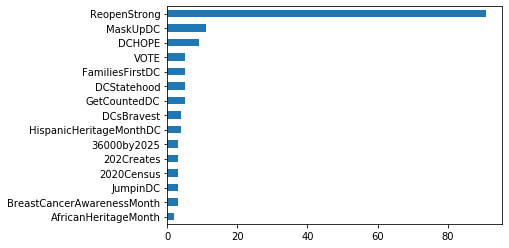

In [123]:
# Plot Hashtags Data
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

tweet_plot = tweet_counts[:15].plot(kind='barh')
tweet_plot.invert_yaxis()